In [2]:
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../data/pearsons_morans_all_countries3.csv", sep=';')
lee_df = pd.read_csv("../data/combined_lee_stats.csv")
display(df.head())
display(lee_df.head())

,name,pearsons,moran_corporate_v1_I,moran_non_corporate_v1_I,moran_corporate_v2_statistic,moran_corporate_v2_expectation,moran_corporate_v2_variance,moran_corporate_v2_sd,moran_corporate_v2_p_value,moran_non_corporate_v2_statistic,moran_non_corporate_v2_expectation,moran_non_corporate_v2_variance,moran_non_corporate_v2_sd,moran_non_corporate_v2_p_value,alternative
0,albania,-0.020993,0.207070,0.303434,0.197449,-0.00116144018583043,0.00044794185829831,93.840.805.805.326,"6,35E-07",0.289336,-0.00116144018583043,0.000447733679491073,137.288.157.744.538,"6,82E-29",two.sided
1,angola,0.060100,0.445729,0.591812,0.425726,"-9,04E+09","5,96E+09",55.169.714.025.223,0,0.565252,"-9,04E+09","5,96E+09",732.391.713.610.079,0,two.sided
2,are,0.000355,0.351037,0.381589,0.338676,-0.000561797752808989,0.000294083484940553,197.819.659.795.391,"4,26E-73",0.368153,-0.000561797752808989,0.000294232922122139,214.953.661.338.581,"1,72E-88",two.sided
3,brazil,-0.077296,0.513912,0.527423,0.506096,"-7,30E+08","3,21E+08",282.467.437.954.253,0,0.519401,"-7,30E+08","3,21E+06",289.892.948.284.755,0,two.sided
4,cambodia,0.028608,0.351528,0.500828,0.345753,-0.000288018433179724,0.000131905109671159,301.298.695.614.628,"1,97E-185",0.492601,-0.000288018433179724,0.000131924035291072,429.128.585.720.833,0,two.sided


,name,leesL,leesL_expectation,leesL_pvalue,alternative
0,AGO,0.053806,0.020567,5.898395e-15,two.sided
1,GRC,-0.136424,-0.034651,8.767315e-84,two.sided
2,KHM,0.038290,0.005366,1.453915e-07,two.sided
3,UKR,-0.014043,-0.005232,9.129520e-05,two.sided
4,PHL,-0.024603,-0.010361,4.800190e-05,two.sided


In [6]:
lee_df.max()

name                       ZAF
leesL                 0.298551
leesL_expectation     0.061373
leesL_pvalue          0.730613
alternative          two.sided
dtype: object

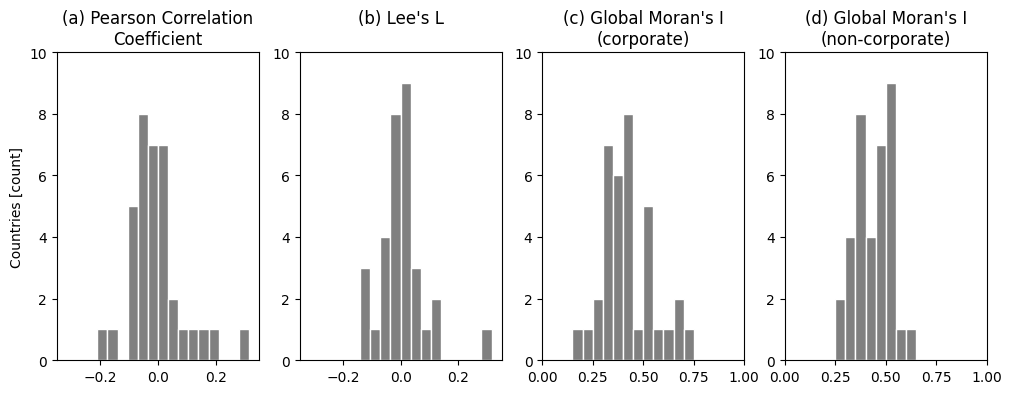

In [16]:
# creating a figure with 2 suplots
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

ax1 = axs[0]
ax1.hist(
    df["pearsons"],
    range=[-0.35, 0.35],
    bins=20,
    color="grey",
    edgecolor="white"
)
ax1.set_xlim((-0.35, 0.35))
ax1.set_ylim((0,10))
ax1.set_ylabel("Countries [count]")
ax1.set_title("(a) Pearson Correlation\nCoefficient")


ax1 = axs[1]
ax1.hist(
    lee_df["leesL"],
    range=[-0.35, 0.35],
    bins=20,
    color="grey",
    edgecolor="white"
)
ax1.set_xlim((-0.35, 0.35))
ax1.set_ylim((0,10))
ax1.set_title("(b) Lee's L\n ")


ax2 = axs[2]
ax2.hist(
    df["moran_corporate_v2_statistic"],
    range=[0,1],
    bins=20,
    color="grey",
    edgecolor="white"
)
ax2.set_xlim((0, 1))
ax2.set_ylim((0,10))
ax2.set_title("(c) Global Moran's I\n(corporate)")

ax3 = axs[3]
ax3.hist(
    df["moran_non_corporate_v2_statistic"],
    range=[0,1],
    bins=20,
    color="grey",
    edgecolor="white"
)
ax3.set_ylim((0,10))
ax3.set_xlim((0, 1))
ax3.set_title("(d) Global Moran's I\n(non-corporate)")

plt.savefig(
    "../figures/figX_histogram_for_spatial_statistics.png",
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.1,
    facecolor='white'
)
plt.show()